# Description of the Notebook: 
## Purpose:
#### This Jupyter Notebook analyzes sales data from a retail store using Python libraries such as Pandas, NumPy, Matplotlib, and Seaborn. The key objectives include:
##### >Data Cleaning: Identifying and removing duplicates, handling missing values, and ensuring data consistency.
##### >Exploratory Data Analysis (EDA): Visualizing trends and patterns related to sales, profits, and customer behavior.
##### >Insights Extraction: Gaining actionable insights to understand product performance and optimize sales strategies.



## Importing required libiraries

In [4]:
from numpy import *
from pandas import *
import seaborn as sns
import matplotlib.pyplot as plt

## Reading data 

In [5]:
Sales_data=read_csv(r"C:\Users\DELL\Documents\My_GitHub\Retail_Store_Sales\Retail Store Sales.csv")

In [6]:
Sales_data.head()

,order_id,order_date,ship_date,customer,manufactory,product_name,segment,category,subcategory,region,zip,city,state,country,discount,profit,quantity,sales,profit_margin
0,US-2020-103800,1/3/2019,1/7/2019,Darren Powers,Message Book,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Consumer,Office Supplies,Paper,Central,77095,Houston,Texas,United States,0.2,5.5512,2,16.448,0.3375
1,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,GBC,GBC Standard Plastic Binding Systems Combs,Home Office,Office Supplies,Binders,Central,60540,Naperville,Illinois,United States,0.8,-5.4870,2,3.540,-1.5500
2,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,Avery,Avery 508,Home Office,Office Supplies,Labels,Central,60540,Naperville,Illinois,United States,0.2,4.2717,3,11.784,0.3625
3,US-2020-112326,1/4/2019,1/8/2019,Phillina Ober,SAFCO,SAFCO Boltless Steel Shelving,Home Office,Office Supplies,Storage,Central,60540,Naperville,Illinois,United States,0.2,-64.7748,3,272.736,-0.2375
4,US-2020-141817,1/5/2019,1/12/2019,Mick Brown,Avery,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Consumer,Office Supplies,Art,East,19143,Philadelphia,Pennsylvania,United States,0.2,4.8840,3,19.536,0.2500


In [7]:
Sales_data.shape

(9994, 19)

# Data Cleaning and Preprocessing

In [8]:
Sales_data.columns

Index(['order_id', 'order_date', 'ship_date', 'customer', 'manufactory',
       'product_name', 'segment', 'category', 'subcategory', 'region', 'zip',
       'city', 'state', 'country', 'discount', 'profit', 'quantity', 'sales',
       'profit_margin'],
      dtype='object')

In [9]:
# Checking the data for null values
Sales_data.isnull().sum()

order_id         0
order_date       0
ship_date        0
customer         0
manufactory      0
product_name     0
segment          0
category         0
subcategory      0
region           0
zip              0
city             0
state            0
country          0
discount         0
profit           0
quantity         0
sales            0
profit_margin    0
dtype: int64

In [10]:
#Checking the data for duplicate values
Sales_data.duplicated().sum()

1

In [11]:
# Dropping duplicate values 
Sales_data=Sales_data.drop_duplicates()

In [12]:
Sales_data.shape

(9993, 19)

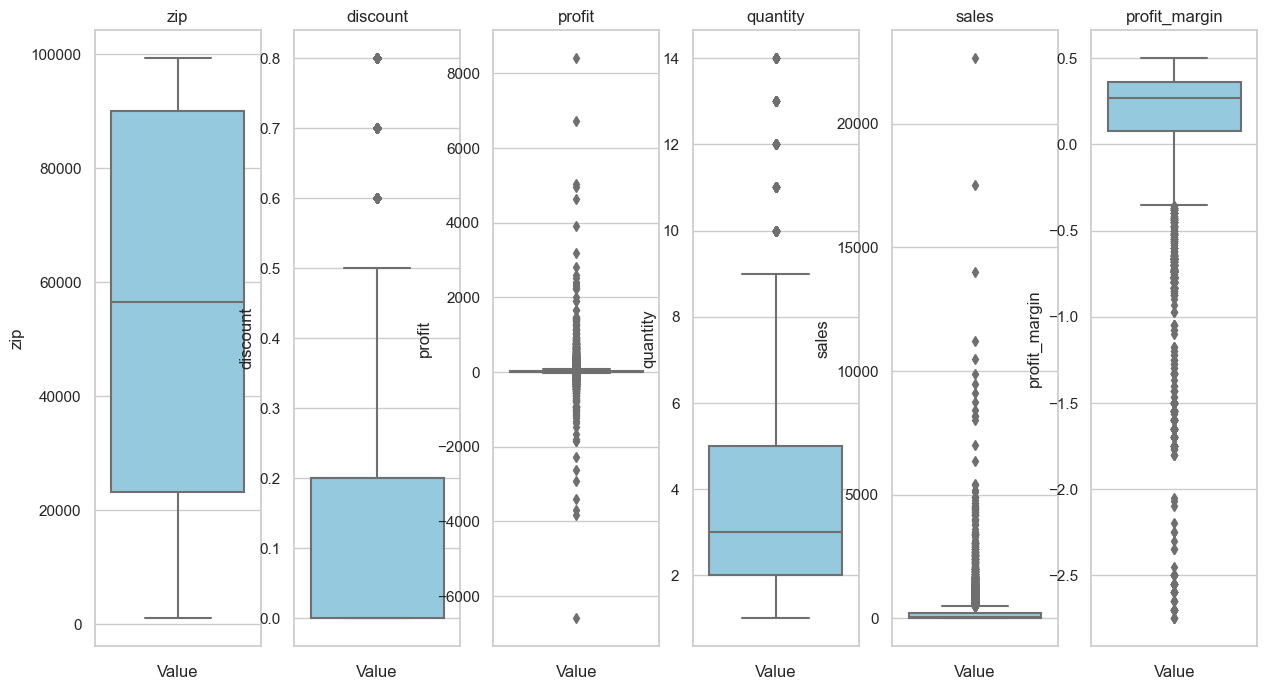

In [13]:
# Visualising all numerical data using Box plot to check data for outliers
numerical_cols =Sales_data.select_dtypes(include=['number'])
# Set the style for the plots
sns.set(style="whitegrid")
# Create a box plot for each numerical column
plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
for i, column in enumerate(numerical_cols.columns, 1):
    plt.subplot(1, len(numerical_cols.columns), i)  # Create subplots
    sns.boxplot(y=Sales_data[column], color="skyblue")
    plt.title(column)
    plt.xlabel("Value")
    plt.ylabel(column)

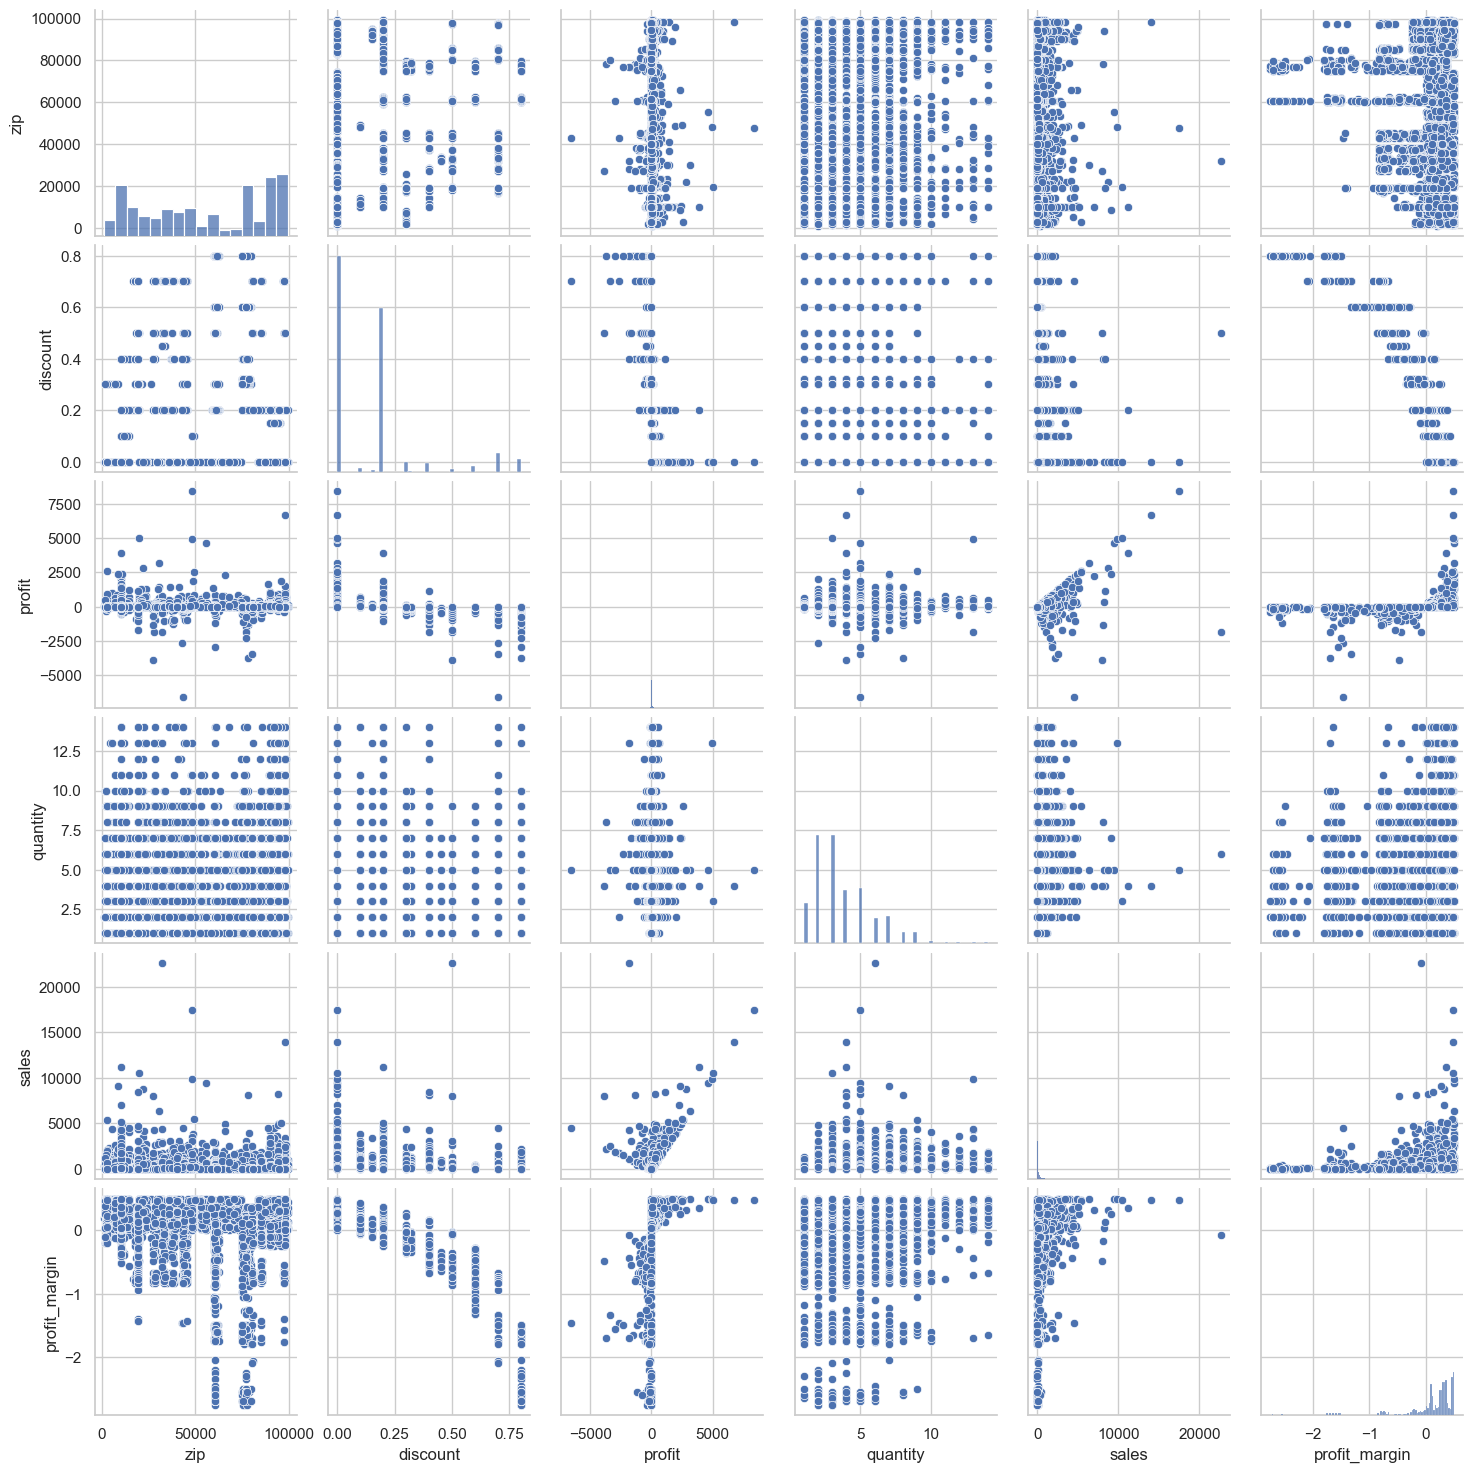

In [14]:
# Using scattering plot to discover outliers in numerical features
sns.pairplot(Sales_data.select_dtypes(include='number'))
plt.show()

In [15]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9993 non-null   object 
 1   order_date     9993 non-null   object 
 2   ship_date      9993 non-null   object 
 3   customer       9993 non-null   object 
 4   manufactory    9993 non-null   object 
 5   product_name   9993 non-null   object 
 6   segment        9993 non-null   object 
 7   category       9993 non-null   object 
 8   subcategory    9993 non-null   object 
 9   region         9993 non-null   object 
 10  zip            9993 non-null   int64  
 11  city           9993 non-null   object 
 12  state          9993 non-null   object 
 13  country        9993 non-null   object 
 14  discount       9993 non-null   float64
 15  profit         9993 non-null   float64
 16  quantity       9993 non-null   int64  
 17  sales          9993 non-null   float64
 18  profit_m

In [16]:
# Adjusting data types
Sales_data["order_date"]=to_datetime(Sales_data['order_date'], errors='coerce')
Sales_data["ship_date"]=to_datetime(Sales_data['ship_date'], errors='coerce')
Sales_data["discount"]=Sales_data["discount"].astype(str)

In [17]:
# Creating new features (Year,Month,Day) from order date
Sales_data['Year'] = Sales_data['order_date'].dt.year
Sales_data['Month'] = Sales_data['order_date'].dt.month
Sales_data['Day'] = Sales_data['order_date'].dt.day

In [18]:
Sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9993 non-null   object        
 1   order_date     9993 non-null   datetime64[ns]
 2   ship_date      9993 non-null   datetime64[ns]
 3   customer       9993 non-null   object        
 4   manufactory    9993 non-null   object        
 5   product_name   9993 non-null   object        
 6   segment        9993 non-null   object        
 7   category       9993 non-null   object        
 8   subcategory    9993 non-null   object        
 9   region         9993 non-null   object        
 10  zip            9993 non-null   int64         
 11  city           9993 non-null   object        
 12  state          9993 non-null   object        
 13  country        9993 non-null   object        
 14  discount       9993 non-null   object        
 15  profit         9993 n

# The previous section included cleaning the data to be ready for analysis and visualisation.
### >The data included 0 null values.
### >There are no outliers in the data.
### >1 raw dropped due to duplicated values.
### >Date and time features were adjusted and created new features like (Year-Month-Day) to be suitable for time series analysis. 

# 

# Exploratory data analysis (EDA)

In [19]:
# Some statistical values for numerical features
Sales_data.describe().T

,count,mean,std,min,25%,50%,75%,max
zip,9993.0,55191.568698,32065.086443,1040.000,23223.000,56560.000,90008.0000,99301.000
profit,9993.0,28.660971,234.271476,-6599.978,1.731,8.671,29.3640,8399.976
quantity,9993.0,3.789753,2.225149,1.000,2.000,3.000,5.0000,14.000
sales,9993.0,229.852846,623.276074,0.444,17.280,54.480,209.9400,22638.480
profit_margin,9993.0,0.120330,0.466775,-2.750,0.075,0.270,0.3625,0.500
Year,9993.0,2020.722406,1.123479,2019.000,2020.000,2021.000,2022.0000,2022.000
Month,9993.0,7.810067,3.284598,1.000,5.000,9.000,11.0000,12.000
Day,9993.0,15.467627,8.748291,1.000,8.000,15.000,23.0000,31.000


### The effect of Discount on both sales and profits

In [20]:
#Defining the number of unique values in discount feature
Sales_data["discount"].unique()

array(['0.2', '0.8', '0.0', '0.6', '0.7', '0.15', '0.5', '0.4', '0.1',
       '0.3', '0.32', '0.45'], dtype=object)

In [21]:
# Calculating the average sales and profits for each discount
Discount_Sales_Profit_relation=Sales_data.groupby(["discount"])["sales","profit"].mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16844\4243330921.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Discount_Sales_Profit_relation=Sales_data.groupby(["discount"])["sales","profit"].mean()


In [22]:
Discount_Sales_Profit_relation

,sales,profit
discount,,
0.0,226.742074,66.900292
0.1,578.397351,96.055074
0.15,529.971567,27.288298
0.2,209.076940,24.702572
0.3,455.510102,-45.828401
0.32,536.794770,-88.560656
0.4,565.134874,-111.927429
0.45,498.634000,-226.646464
0.5,892.705152,-310.703456


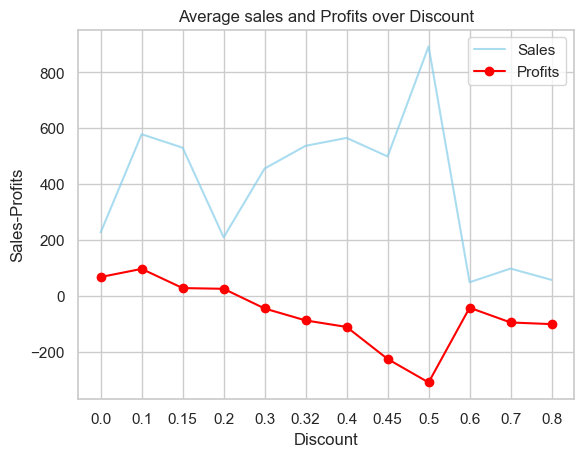

In [23]:
# Visualising the result 
plt.plot(Discount_Sales_Profit_relation.index,Discount_Sales_Profit_relation["sales"],color='skyblue', alpha=0.7,label='Sales')
plt.plot(Discount_Sales_Profit_relation.index,Discount_Sales_Profit_relation["profit"],color='red', marker='o',label='Profits')
plt.title("Average sales and Profits over Discount")
plt.ylabel("Sales-Profits")
plt.xlabel("Discount")
plt.legend(loc='best')
plt.show()

### For the previous relation, As the discount increase, The sales increase but the profits decrease.
### As a result we we shouldn't increase the discount over  20% to avoid negative profits.

# 

### Sum sales and profits per each Segment 

In [24]:
# number of unique values per each segment
Sales_data["segment"].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [25]:
# Grouping data to calculate total Sales and profits per each segment
Sales_Profits_Segment=Sales_data.groupby(["segment"])["sales","profit"].sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16844\3740725985.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Sales_Profits_Segment=Sales_data.groupby(["segment"])["sales","profit"].sum()


In [26]:
Sales_Profits_Segment

,sales,profit
segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.293718e+05,60310.7373


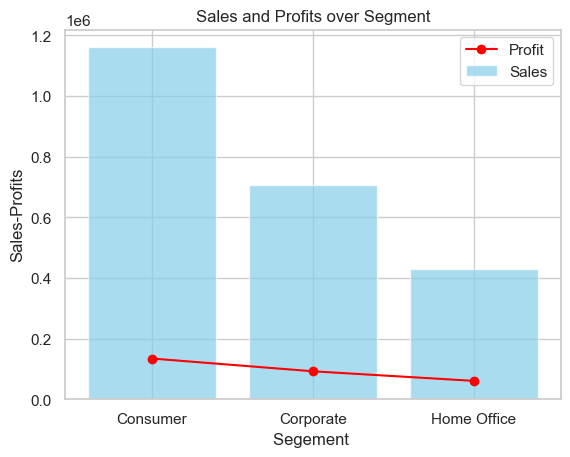

In [27]:
# Visualising the relation between sales and profits and each segment
plt.style.use("_classic_test_patch")
plt.bar(Sales_Profits_Segment.index,Sales_Profits_Segment["sales"],color='skyblue',alpha=0.7,label='Sales')
plt.plot(Sales_Profits_Segment.index,Sales_Profits_Segment["profit"],color='red',marker='o',label='Profit')
plt.title("Sales and Profits over Segment")
plt.ylabel("Sales-Profits")
plt.xlabel("Segement ")
plt.legend(loc='best')
plt.show()

## From previous relation: 
### >Consumer has the highest sales and profits.
### >Home office has the lowest sales and profit.

# 

### Sales, Profits and N of orders per each category 

In [28]:
# N of unique categories
Sales_data["category"].unique()

array(['Office Supplies', 'Furniture', 'Technology'], dtype=object)

In [29]:
# Calculating the number of orders per eacg category
Orders_per_each_category=Sales_data.groupby(["category"])["order_id"].count().to_frame(name="N of orders")

In [30]:
Orders_per_each_category

,N of orders
category,
Furniture,2120
Office Supplies,6026
Technology,1847


Text(0.5, 1.0, 'N of orders per each Caategory')

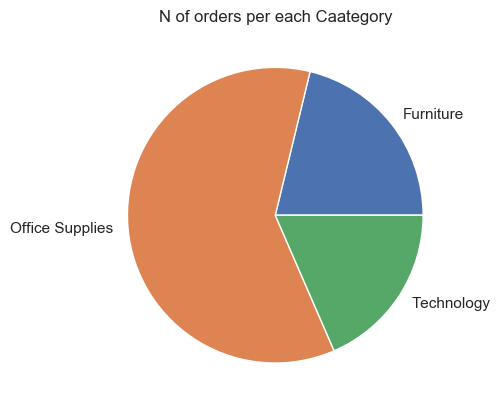

In [31]:
# Visualising the number of orders per each category
plt.pie(Orders_per_each_category["N of orders"],labels=Orders_per_each_category.index)
plt.title("N of orders per each Caategory")

In [32]:
#Grouping data to calc the sales and profits per each category
Profits_per_each_category=Sales_data.groupby(["category"])["sales","profit"].sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16844\4190289532.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Profits_per_each_category=Sales_data.groupby(["category"])["sales","profit"].sum()


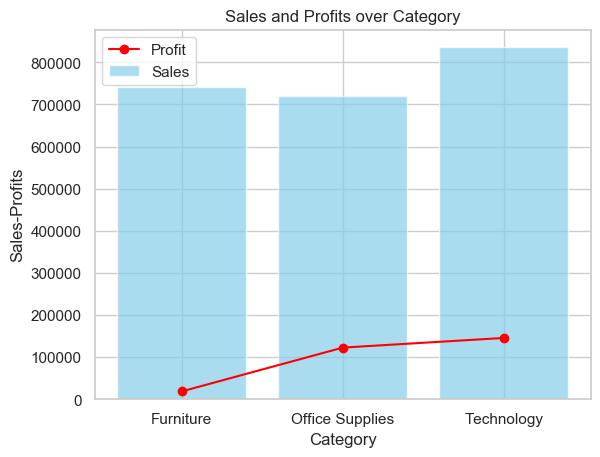

In [33]:
plt.style.use("_classic_test_patch")
plt.bar(Profits_per_each_category.index,Profits_per_each_category["sales"],color='skyblue',alpha=0.7,label='Sales')
plt.plot(Profits_per_each_category.index,Profits_per_each_category["profit"],color='red',marker='o',label='Profit')
plt.title("Sales and Profits over Category")
plt.ylabel("Sales-Profits")
plt.xlabel("Category")
plt.legend(loc='best')
plt.show()

### From the previous relations:
#### >Office supplies have the highest number of orders and moderate sales and profits.
#### >Technology has the highest sales and profits.

# 

### Subcategories with highest sales 

In [34]:
# Top 5 subcategories with highest sales and profits
Top_5_subcategories=Sales_data.groupby(["subcategory"])["sales","profit"].sum().sort_values(by="sales",ascending=False).head(5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16844\253265760.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Top_5_subcategories=Sales_data.groupby(["subcategory"])["sales","profit"].sum().sort_values(by="sales",ascending=False).head(5)


In [35]:
Top_5_subcategories

,sales,profit
subcategory,,
Phones,330007.054,44515.7306
Chairs,328167.731,26602.2251
Storage,223843.608,21278.8264
Tables,206965.532,-17725.4811
Binders,203412.733,30221.7633


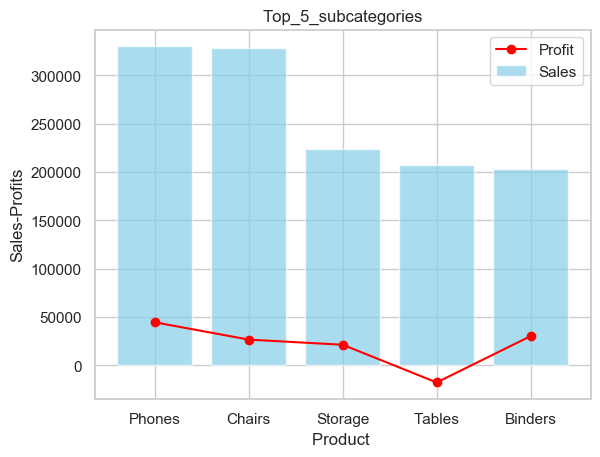

In [36]:
plt.style.use("_classic_test_patch")
plt.bar(Top_5_subcategories.index,Top_5_subcategories["sales"],color='skyblue',alpha=0.7,label='Sales')
plt.plot(Top_5_subcategories.index,Top_5_subcategories["profit"],color='red',marker='o',label='Profit')
plt.title("Top_5_subcategories")
plt.ylabel("Sales-Profits")
plt.xlabel("Product ")
plt.legend(loc='best')
plt.show()

In [37]:
#Subcategories with lowest sales and profits
Subcategories_with_Lowest_sales=Sales_data.groupby(["subcategory"])["sales","profit"].sum().sort_values(by="sales",ascending=True).head(5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_16844\367916421.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Subcategories_with_Lowest_sales=Sales_data.groupby(["subcategory"])["sales","profit"].sum().sort_values(by="sales",ascending=True).head(5)


In [38]:
Subcategories_with_Lowest_sales

,sales,profit
subcategory,,
Fasteners,3024.280,949.5182
Labels,12486.312,5546.2540
Envelopes,16476.402,6964.1767
Art,27118.792,6527.7870
Supplies,46673.538,-1189.0995


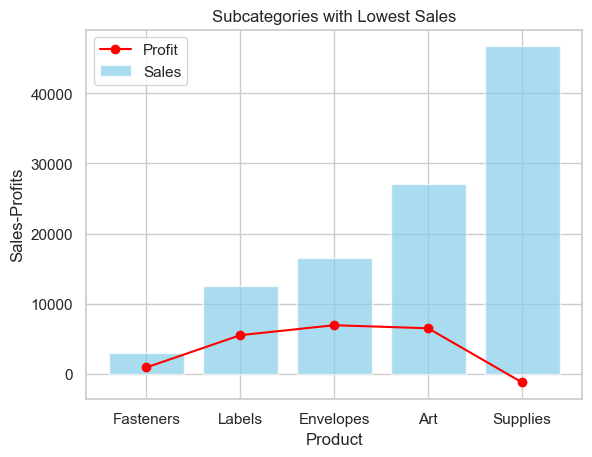

In [39]:
plt.style.use("_classic_test_patch")
plt.bar(Subcategories_with_Lowest_sales.index,Subcategories_with_Lowest_sales["sales"],color='skyblue',alpha=0.7,label='Sales')
plt.plot(Subcategories_with_Lowest_sales.index,Subcategories_with_Lowest_sales["profit"],color='red',marker='o',label='Profit')
plt.title("Subcategories with Lowest Sales")
plt.ylabel("Sales-Profits")
plt.xlabel("Product")
plt.legend(loc='best')
plt.show()

### From previous relations :
#### >Phones and Chairs have the highest sales and profits.
#### >Fasteners and labels have the lowest sales and profits.

# 

### Customers purchasing behavior and customers with highest sales  

In [40]:
# N of customers
Sales_data["customer"].nunique()

793

In [41]:
# Identifing the customers with highest sales
Customers_with_highest_sales=Sales_data.groupby(["customer"])["sales"].sum().to_frame(name="Total Sales").sort_values(by="Total Sales",ascending=False).head(5)

Text(0, 0.5, 'Sales')

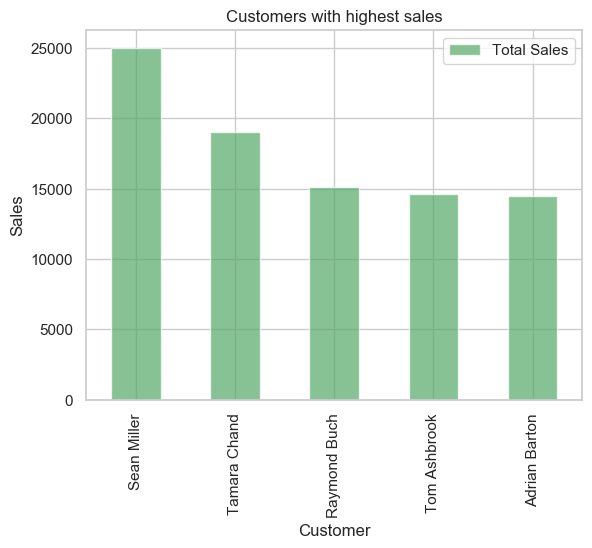

In [42]:
Customers_with_highest_sales.plot(kind="bar",color="g",alpha=0.7)
plt.title("Customers with highest sales")
plt.xlabel("Customer", fontsize=12)
plt.ylabel("Sales", fontsize=12)

In [43]:
# Customers purchasing behavior
Customers_with_highest_N_orders=Sales_data.groupby(["customer"])["order_id"].count().to_frame(name="Total N of Orders").sort_values(by="Total N of Orders",ascending=False).head(5)

Text(0.5, 1.0, 'Customers with highest N of orders')

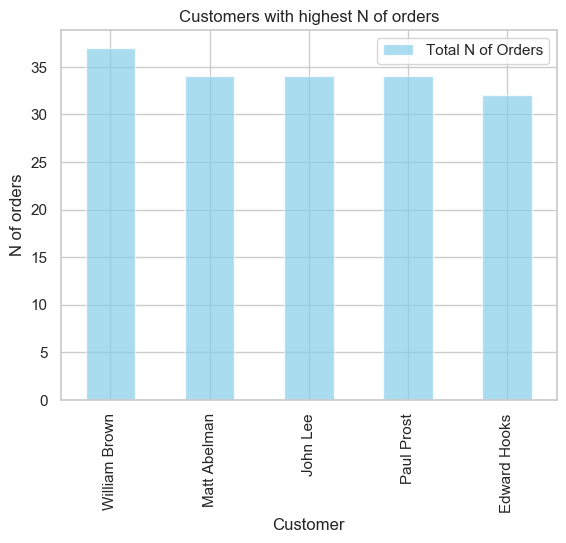

In [44]:
Customers_with_highest_N_orders.plot(kind="bar",color="skyblue",alpha=0.7)
plt.xlabel("Customer", fontsize=12)
plt.ylabel("N of orders", fontsize=12)
plt.title("Customers with highest N of orders")

### From the previous charts:
#### >We have customers with high sales volum and customers with high purchasing behavior

# 

### States with highest sales

In [45]:
# N of states
Sales_data["state"].nunique()

49

In [46]:
# Determining the states with the highest sales
States_with_highest_sales=Sales_data.groupby(["state"])["sales"].sum().to_frame(name="Total Sales").sort_values(by="Total Sales",ascending=False).head(5)

Text(0.5, 1.0, 'states with the highest sales')

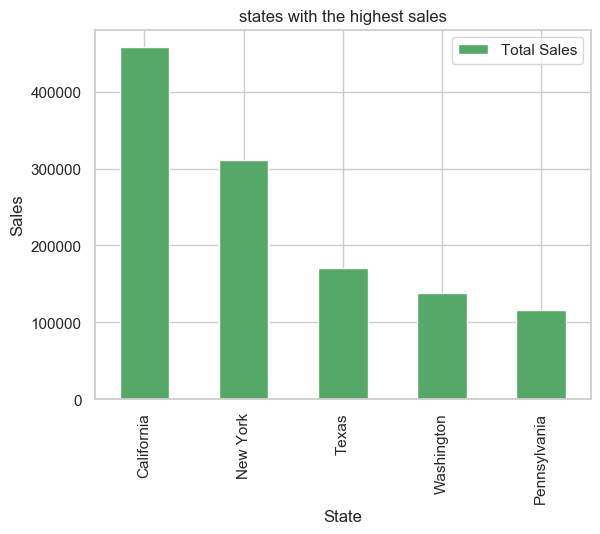

In [47]:
States_with_highest_sales.plot(kind="bar",color="g")
plt.xlabel("State", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.title("states with the highest sales")

### California and NewYork have the highest sales with total sales higher than 300000$ 

# 

## Time series analysis 

In [48]:
# Sales and profits per each month
Monthly_Sales_Profit=Sales_data.groupby(["Year","Month"])["sales","profit"].sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16844\1672401636.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Monthly_Sales_Profit=Sales_data.groupby(["Year","Month"])["sales","profit"].sum()


In [49]:
Monthly_Sales_Profit

sales      profit
Year Month                         
2019 1       14236.8950   2450.1907
     2        4519.8920    862.3084
     3       55691.0090    498.7299
     4       28013.9730   3500.8940
     5       23648.2870   2738.7096
     6       34595.1276   4976.5244
     7       33946.3930   -841.4826
     8       27909.4685   5318.1050
     9       81777.3508   8328.0994
     10      31453.3930   3448.2573
     11      78628.7167   9292.1269
     12      69545.6205   8983.5699
2020 1       18174.0756  -3281.0070
     2       11951.4110   2813.8508
     3       38726.2520   9732.0978
     4       34195.2085   4187.4962
     5       30131.6865   4667.8690
     6       24797.2920   3335.5572
     7       28765.3250   3288.6483
     8       36898.3322   5355.8084
     9       64595.9180   8209.1627
     10      31404.9235   2817.3660
     11      75972.5635  12474.7884
     12      74919.5212   8016.9659
2021 1       18542.4910   2824.8233
     2       22978.8150   5004.5795
     3       51715.8750   3611.9680
     4       38750.0390   2977.8149
     5       56987.7280   8662.1464
     6       40344.5340   4750.3781
     7       39261.9630   4432.8779
     8       31115.3743   2062.0693
     9       73410.0249   9328.6576
     10      59687.7450  16243.1425
     11      79411.9658   4011.4075
     12      96999.0430  17885.3093
2022 1       43971.3740   7140.4391
     2       20301.1334   1613.8720
     3       58872.3528  14751.8915
     4       36521.5361    933.2900
     5       44261.1102   6342.5828
     6       52981.7257   8223.3357
     7       45264.4160   6952.6212
     8       63120.8880   9040.9557
     9       87866.6520  10991.5556
     10      77776.9232   9275.2755
     11     118447.8250   9690.1037
     12      83829.3188   8483.3468

Text(0.5, 1.0, 'Months with highest sales and profits')

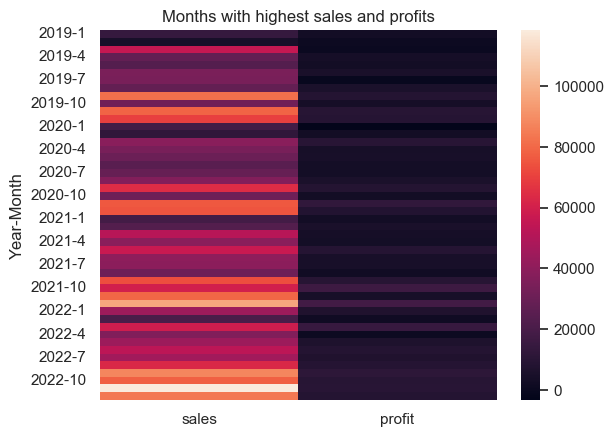

In [50]:
# Using heatmap to distinguish the months with highest sales and months with lowest sales
sns.heatmap(Monthly_Sales_Profit)
plt.title("Months with highest sales and profits")

In [51]:
# Identifing the months with highest number of orders
Months_Highest_sales=Sales_data.groupby(["Year","Month"])["order_id"].count().to_frame(name="N of orders")

Text(0.5, 1.0, 'Months with highest N of orders')

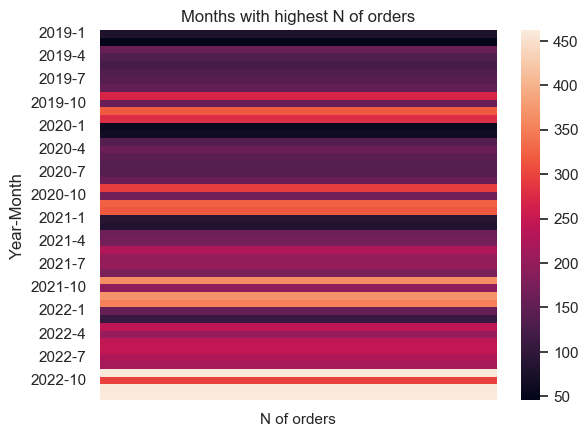

In [52]:
sns.heatmap(Months_Highest_sales)
plt.title("Months with highest N of orders")

### From the previous relations:
#### >Sales and profits are very high in the period between September and December. 
#### >Sales and profits are very low in the period between January and March.
#### >Sales and profits are moderate in the rest of the year. 

# 

### Sales and profits trend over months 

In [53]:
# Sales and profits over months
Sales_profits_over_months=Sales_data.groupby(["Year","Month"])[["sales","profit"]].sum().reset_index()

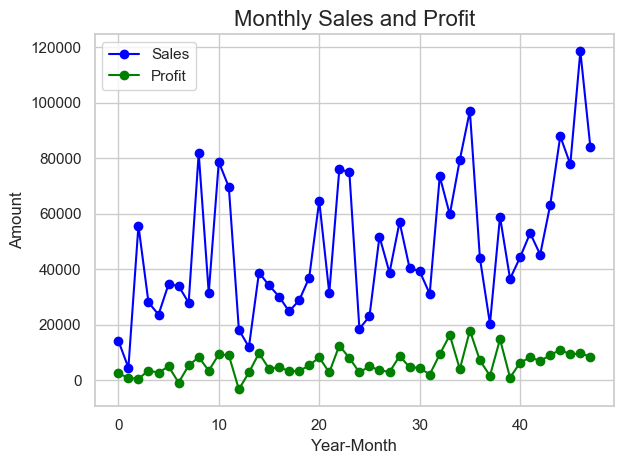

In [54]:
plt.plot(Sales_profits_over_months.index, Sales_profits_over_months["sales"], label="Sales", marker='o', color='blue')
plt.plot(Sales_profits_over_months.index, Sales_profits_over_months["profit"], label="Profit", marker='o', color='green')
plt.title("Monthly Sales and Profit", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Amount", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Profits')

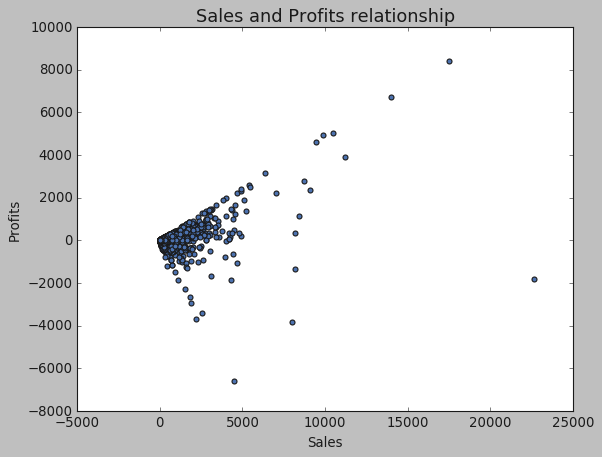

In [55]:
# The relation between sales and profits
plt.style.use("classic")
plt.scatter(Sales_data["sales"],Sales_data["profit"])
plt.title("Sales and Profits relationship", fontsize=16)
plt.xlabel("Sales", fontsize=12)
plt.ylabel("Profits", fontsize=12)

### As the sales increase, profits increase. 

# 

### Discovering other data correlations

In [56]:
correlatios=Sales_data.corr()

In [57]:
correlatios

,zip,profit,quantity,sales,profit_margin,Year,Month,Day
zip,1.000000,-0.029968,0.012731,-0.023851,-0.064418,0.004242,0.026193,0.016878
profit,-0.029968,1.000000,0.066241,0.479067,0.223727,0.004644,-0.000522,-0.002949
quantity,0.012731,0.066241,1.000000,0.200808,-0.005308,-0.005934,0.023264,0.011668
sales,-0.023851,0.479067,0.200808,1.000000,0.003447,-0.009667,-0.000615,0.003145
profit_margin,-0.064418,0.223727,-0.005308,0.003447,1.000000,-0.000015,0.010252,0.004459
Year,0.004242,0.004644,-0.005934,-0.009667,-0.000015,1.000000,-0.020364,-0.017329
Month,0.026193,-0.000522,0.023264,-0.000615,0.010252,-0.020364,1.000000,-0.033465
Day,0.016878,-0.002949,0.011668,0.003145,0.004459,-0.017329,-0.033465,1.000000


<AxesSubplot:>

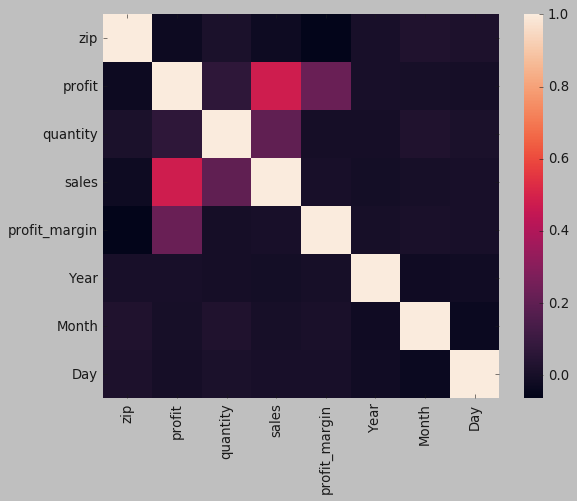

In [58]:
sns.heatmap(correlatios)

# 

# Conclusion
### This project focused on analyzing sales data from a retail store to uncover trends and actionable insights. Here are the key takeaways:

#### Sales and Profit Trends:
###### >Identified the top-performing products and categories that contributed significantly to overall sales and profits.
###### >Analyzed seasonal trends and observed peak sales periods.

#### Customer Behavior:
###### >Gained insights into customer preferences and buying patterns.
###### >Highlighted key customer demographics contributing to revenue.

#### Operational Insights:
###### >Found inefficiencies, such as products with high sales but low profitability.
###### >Provided recommendations for inventory optimization and sales strategy refinement.

#### Visualization Impact:
###### >Utilized scatter plots, bar charts, and heatmaps to clearly illustrate patterns and correlations within the data.

### By cleaning and analyzing the data, this project has demonstrated the importance of data-driven decision-making in retail sales. These insights can be used to improve overall profitability.